<a href="https://colab.research.google.com/github/sheikhrakib0/Stroke-Prediction-Using-ML/blob/main/StrokePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Datasets are uploaded to the temporary disk
train = pd.read_csv('/content/train .csv')
test = pd.read_csv('/content/test.csv')
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [ ]:
train.shape, test.shape

((15304, 12), (10204, 11))

In [ ]:
train["work_type"].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [ ]:
train.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000
mean,7651.500000,41.417708,0.049726,0.023327,89.039853,28.112721,0.041296
std,4418.028595,21.444673,0.217384,0.150946,25.476102,6.722315,0.198981
min,0.000000,0.080000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,3825.750000,26.000000,0.000000,0.000000,74.900000,23.500000,0.000000
50%,7651.500000,43.000000,0.000000,0.000000,85.120000,27.600000,0.000000
75%,11477.250000,57.000000,0.000000,0.000000,96.980000,32.000000,0.000000
max,15303.000000,82.000000,1.000000,1.000000,267.600000,80.100000,1.000000


In [ ]:
train['stroke'].value_counts()

,count
stroke,
0,14672
1,632


In [ ]:
train['age'].unique()

array([2.80e+01, 3.30e+01, 4.20e+01, 5.60e+01, 2.40e+01, 3.40e+01,
       5.30e+01, 7.80e+01, 4.50e+01, 6.20e+01, 5.10e+01, 4.00e+00,
       2.30e+01, 3.60e+01, 5.90e+01, 4.00e+01, 4.70e+01, 3.10e+01,
       1.72e+00, 7.10e+01, 5.00e+01, 5.50e+01, 3.80e+01, 5.70e+01,
       1.20e+01, 6.10e+01, 4.80e+01, 1.70e+01, 5.80e+01, 2.60e+01,
       8.00e+00, 2.00e+00, 3.90e+01, 5.20e+01, 1.90e+01, 5.40e+01,
       7.20e+01, 1.50e+01, 1.10e+01, 7.60e+01, 8.20e+01, 1.80e+01,
       7.40e+01, 4.30e+01, 2.10e+01, 6.50e+01, 9.00e+00, 8.00e+01,
       6.80e+01, 4.40e+01, 3.20e+01, 7.00e+00, 2.50e+01, 7.90e+01,
       6.30e+01, 5.00e+00, 8.10e+01, 1.00e+01, 3.00e+00, 6.00e+01,
       4.90e+01, 3.20e-01, 6.00e+00, 7.00e+01, 7.30e+01, 2.00e+01,
       4.60e+01, 3.70e+01, 6.70e+01, 2.90e+01, 6.90e+01, 1.32e+00,
       3.00e+01, 1.40e+01, 7.50e+01, 2.20e+01, 2.70e+01, 7.70e+01,
       3.50e+01, 6.60e+01, 1.80e+00, 1.88e+00, 8.80e-01, 1.30e+01,
       1.48e+00, 4.10e+01, 6.40e+01, 1.30e+00, 1.60e-01, 8.00e

In [ ]:
# Preproccessing
train['age'] = np.ceil(train['age'])
test['age'] = np.ceil(test['age'])

In [ ]:
train['gender'].value_counts()

,count
gender,
Female,9446
Male,5857
Other,1


In [ ]:
train.drop(train[train['gender']== "Other"].index, inplace=True)
test.drop(test[test['gender']== "Other"].index, inplace=True)

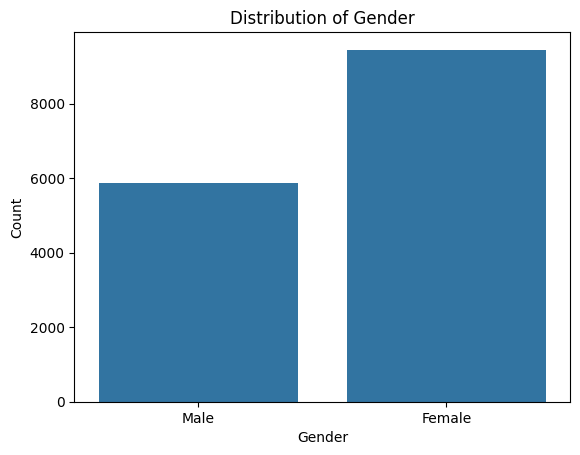

In [ ]:
sns.countplot(x='gender', data=train)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Distribution of Gender")
plt.show()

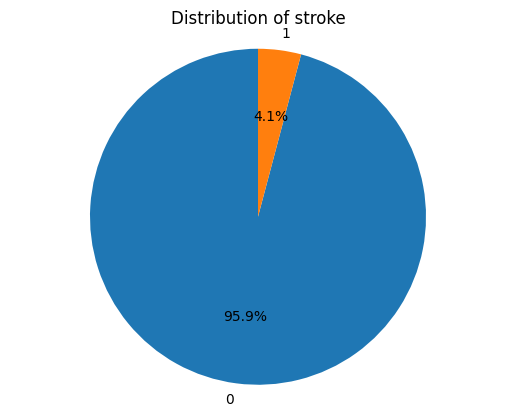

In [ ]:
stroke_counts = train['stroke'].value_counts()
plt.pie(stroke_counts.values, labels=stroke_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Distribution of stroke")
plt.show()

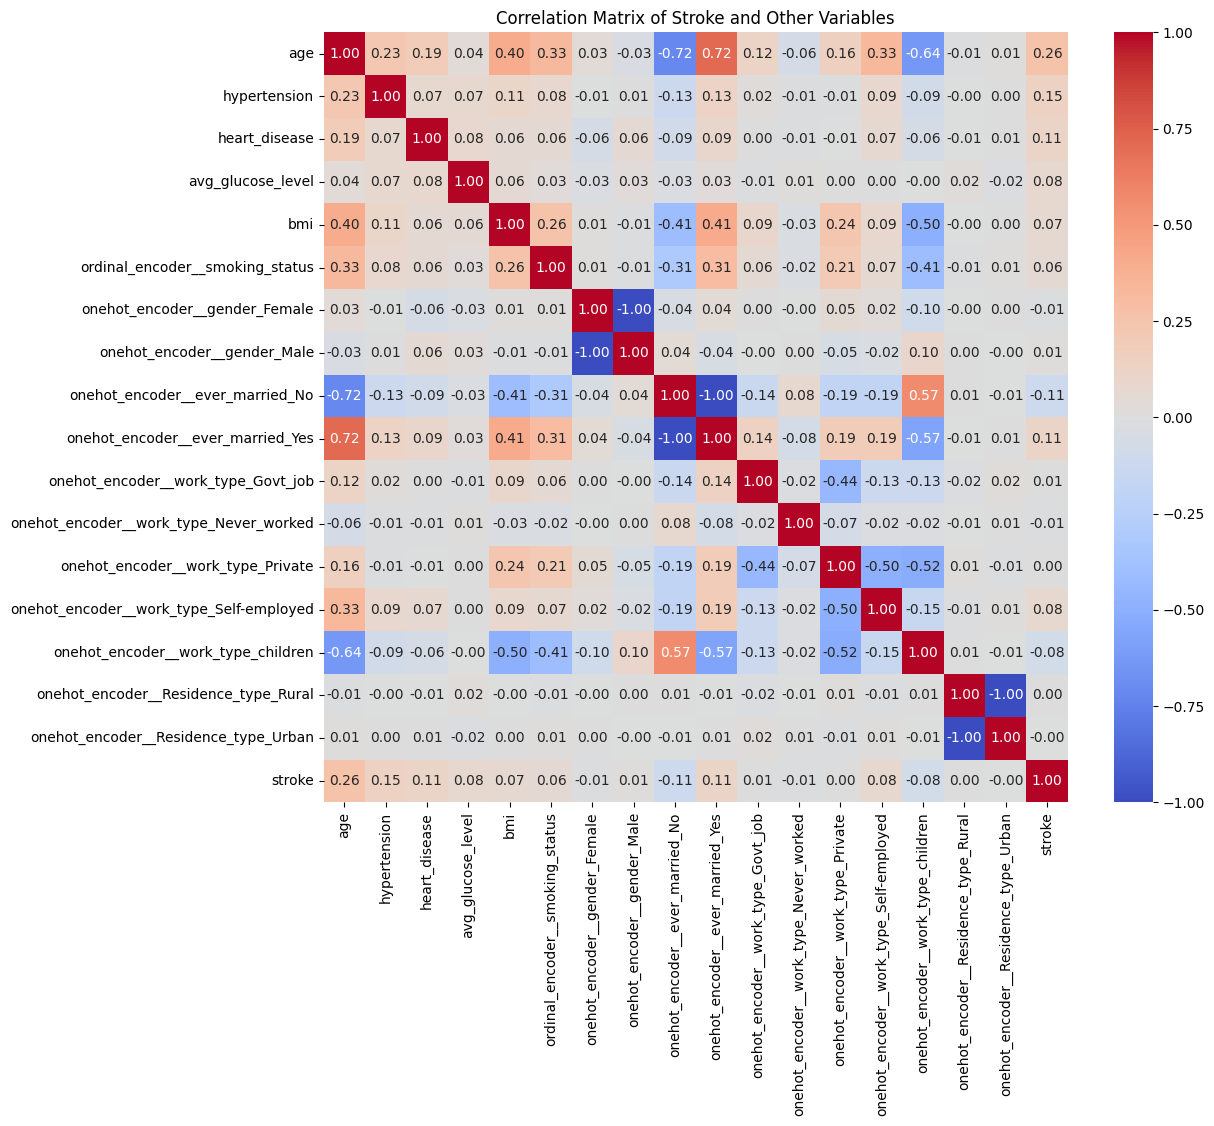

In [ ]:
train_coded = pd.concat([x_train, y_train], axis=1)
correlation_matrix = train_coded.corr()  # Calculate correlation matrix

# Create a heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Stroke and Other Variables')
plt.show()

In [ ]:
train.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

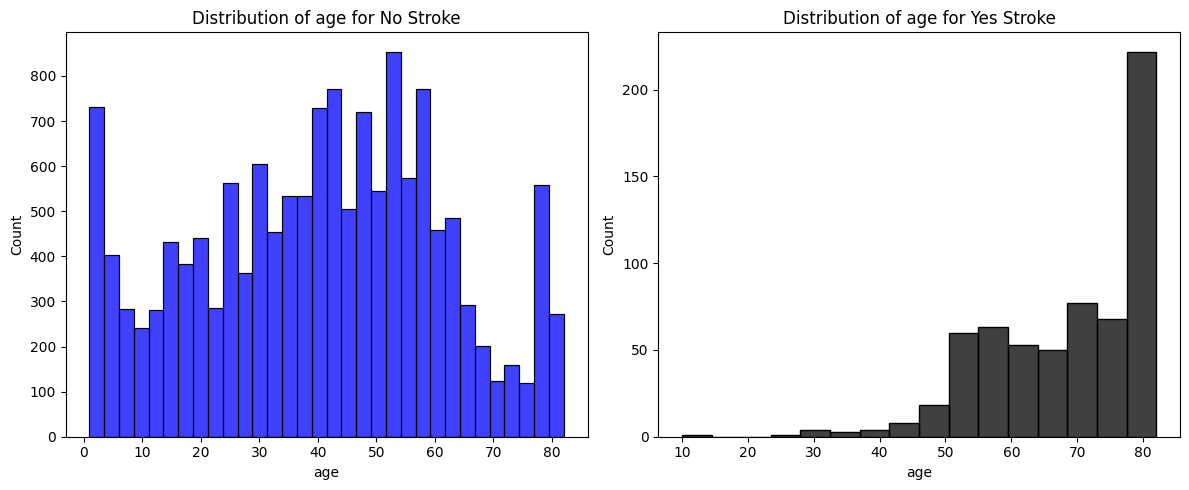

In [ ]:

# Assuming 'train' is your DataFrame and 'feature_name' is the column to plot
feature_name = 'age'  # Replace with your desired feature

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Adjust figsize as needed

# Plot for 'No stroke' (stroke == 0)
sns.histplot(train[train['stroke'] == 0][feature_name], ax=axes[0], color='blue')
axes[0].set_title(f'Distribution of {feature_name} for No Stroke')
axes[0].set_xlabel(feature_name)
axes[0].set_ylabel('Count')

# Plot for 'Yes stroke' (stroke == 1)
sns.histplot(train[train['stroke'] == 1][feature_name], ax=axes[1], color='black')
axes[1].set_title(f'Distribution of {feature_name} for Yes Stroke')
axes[1].set_xlabel(feature_name)
axes[1].set_ylabel('Count')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

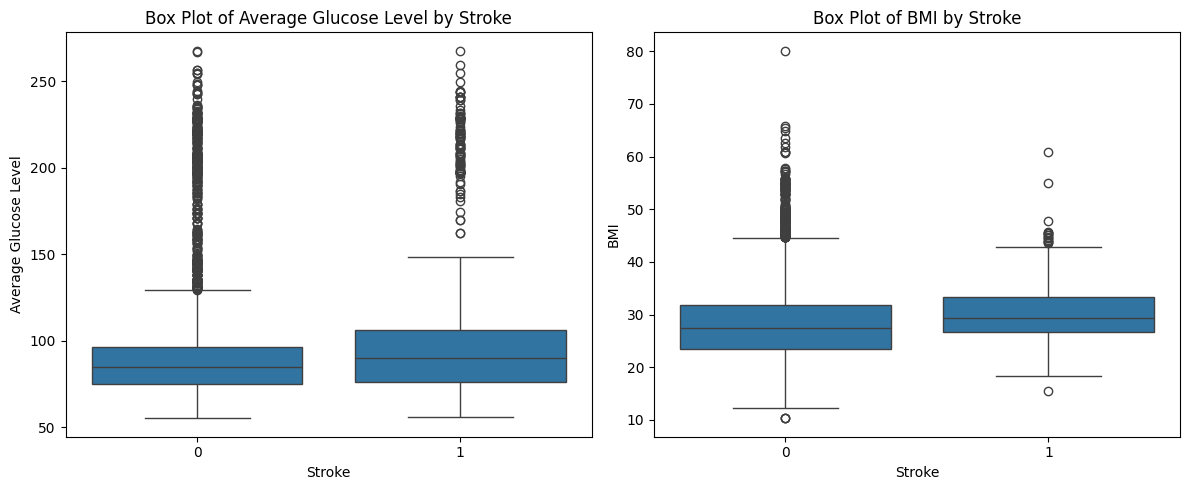

In [ ]:

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Adjust figsize as needed

# Box plot for 'avg_glucose_level'
sns.boxplot(x='stroke', y='avg_glucose_level', data=train, ax=axes[0])
axes[0].set_title('Box Plot of Average Glucose Level by Stroke')
axes[0].set_xlabel('Stroke')
axes[0].set_ylabel('Average Glucose Level')

# Box plot for 'bmi'
sns.boxplot(x='stroke', y='bmi', data=train, ax=axes[1])
axes[1].set_title('Box Plot of BMI by Stroke')
axes[1].set_xlabel('Stroke')
axes[1].set_ylabel('BMI')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

**There are lot's of outliers in the dataset so we need to handle the outliers**

In [ ]:
# A funciton
def handle_outliers_iqr(df, column):
    """
    Handles outliers in a DataFrame column using IQR.

    Args:
        df (pandas.DataFrame): The DataFrame containing the data.
        column (str): The name of the column to handle outliers in.

    Returns:
        pandas.DataFrame: The DataFrame with outliers replaced by IQR limits.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.clip(df[column], lower_bound, upper_bound)
    return df

# Apply the function to specific columns
for column in ['avg_glucose_level', 'bmi']:
    train = handle_outliers_iqr(train, column)


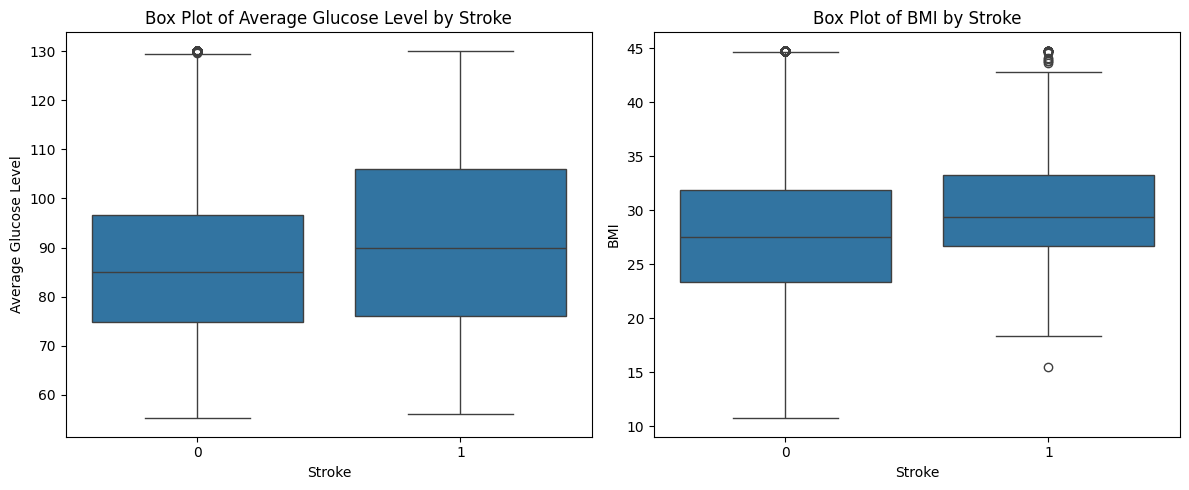

In [ ]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Adjust figsize as needed

# Box plot for 'avg_glucose_level'
sns.boxplot(x='stroke', y='avg_glucose_level', data=train, ax=axes[0])
axes[0].set_title('Box Plot of Average Glucose Level by Stroke')
axes[0].set_xlabel('Stroke')
axes[0].set_ylabel('Average Glucose Level')

# Box plot for 'bmi'
sns.boxplot(x='stroke', y='bmi', data=train, ax=axes[1])
axes[1].set_title('Box Plot of BMI by Stroke')
axes[1].set_xlabel('Stroke')
axes[1].set_ylabel('BMI')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

*Now We need to Prepare the dataset for the model like encoding, and transformation of the features*

In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

In [ ]:
input_cols = list(train.columns)[1:-1]

In [ ]:
target_col = 'stroke'

In [ ]:
input_cols

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status']

In [ ]:
train_input = train[input_cols].copy()
train_target = train[target_col].copy()

test_input = test[input_cols].copy()


In [ ]:
train["smoking_status"].unique()

array(['never smoked', 'formerly smoked', 'Unknown', 'smokes'],
      dtype=object)

In [ ]:
numerical_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type']

In [ ]:
ordinal_enc = OrdinalEncoder(categories=[['Unknown','never smoked', 'formerly smoked', 'smokes']])

onehot_enc = OneHotEncoder(handle_unknown='ignore')

In [ ]:
preprocessor = ColumnTransformer([
    ('ordinal_encoder', ordinal_enc, ['smoking_status']),
    ('onehot_encoder', onehot_enc, categorical_cols)
])

In [ ]:
preprocessor.fit(train_input)

,transformers,"[('ordinal_encoder', ...), ('onehot_encoder', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,"[['Unknown', 'never smoked', ...]]"
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'


In [ ]:
encoded_cols = list(preprocessor.get_feature_names_out())

In [ ]:
encoded_cols

['ordinal_encoder__smoking_status',
 'onehot_encoder__gender_Female',
 'onehot_encoder__gender_Male',
 'onehot_encoder__ever_married_No',
 'onehot_encoder__ever_married_Yes',
 'onehot_encoder__work_type_Govt_job',
 'onehot_encoder__work_type_Never_worked',
 'onehot_encoder__work_type_Private',
 'onehot_encoder__work_type_Self-employed',
 'onehot_encoder__work_type_children',
 'onehot_encoder__Residence_type_Rural',
 'onehot_encoder__Residence_type_Urban']

In [ ]:
train_input[encoded_cols] = preprocessor.transform(train_input)
#test_input[encoded_cols] = preprocessor.transform(test_input)

In [ ]:
x_train = train_input[numerical_cols + encoded_cols]
#x_test = test_input[numerical_cols + encoded_cols]

y_train = train[target_col]

In [ ]:
len(x_train.columns)

17

In [ ]:
x_train.shape, x_test.shape


((15303, 17), (10203, 17))

In [ ]:
#spliting dataset
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [ ]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((12242, 17), (3061, 17), (12242,), (3061,))

In [ ]:
# model selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
models = [
    ('Logistic Regression', LogisticRegression(class_weight='balanced')),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('LightGBM', LGBMClassifier(verbose = 1)),
    ('XGBoost', XGBClassifier())
]

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

In [ ]:
def evaluate_models(model, x_train, y_train, x_val, y_val):
  y_pred = model.predict(x_val)
  confusion_mat = confusion_matrix(y_val, y_pred)
  classification_rep = classification_report(y_val, y_pred)
  accuracy = accuracy_score(y_val, y_pred)
  precison = precision_score(y_val, y_pred)
  recall = recall_score(y_val, y_pred)
  f1 = f1_score(y_val, y_pred)

  # Calculate ROC curve and AUC
  if hasattr(model, "predict_proba"):
    y_pred_proba = model.predict_proba(x_val)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
    auc = roc_auc_score(y_val, y_pred_proba)
  else:
    fpr, tpr, auc = None, None, None # Handle models without predict_proba

  return confusion_mat, classification_rep, accuracy, precison, recall, f1, fpr, tpr, auc

In [ ]:
confusion_mats = {}
def metric_df(model, model_name):
  confusion_mat, classification_rep, accuracy, precision, recall, f1, fpr, tpr, auc = evaluate_models(model, x_train, y_train, x_val, y_val)
  confusion_mats[model_name] = confusion_mat
  df = [[accuracy, precision, recall, f1, auc]]
  model_metrics = pd.DataFrame(df, columns=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])
  model_metrics.insert(0, 'Model Name', model_name)
  return model_metrics

In [ ]:
predictions = []
for model_name, model in models:
  model.fit(x_train, y_train)
  model_metrics = metric_df(model, model_name)
  predictions.append(model_metrics)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1706: UndefinedMetr

[LightGBM] [Info] Number of positive: 498, number of negative: 11744
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001249 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 619
[LightGBM] [Info] Number of data points in the train set: 12242, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.040680 -> initscore=-3.160498
[LightGBM] [Info] Start training from score -3.160498


In [ ]:
all_predictions = pd.concat(predictions, ignore_index=True)

/tmp/ipython-input-37-167714947.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_predictions = pd.concat(predictions, ignore_index=True)


In [ ]:
all_predictions

,Model Name,Accuracy,Precision,Recall,F1 Score,AUC
0,Logistic Regression,0.785038,0.148794,0.828358,0.252273,0.883606
1,Decision Tree,0.927148,0.205298,0.231343,0.217544,0.595173
2,Random Forest,0.954590,0.391304,0.067164,0.114650,0.828925
3,Support Vector Machine,0.956223,0.000000,0.000000,0.000000,NaN
4,K-Nearest Neighbors,0.953610,0.366667,0.082090,0.134146,0.703627
5,Naive Bayes,0.458347,0.071429,0.947761,0.132845,0.849981
6,LightGBM,0.955897,0.481481,0.097015,0.161491,0.875906
7,XGBoost,0.952957,0.386364,0.126866,0.191011,0.858324


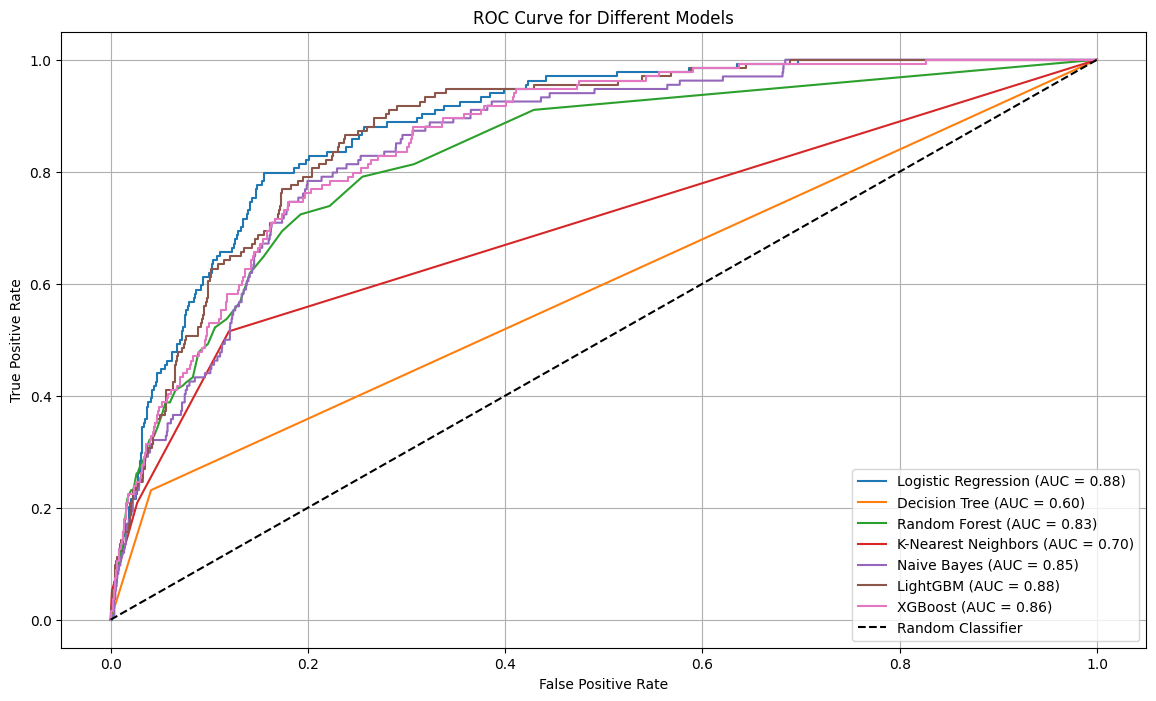

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Create a figure and axes
plt.figure(figsize=(14, 8))

# Iterate through models and plot ROC curve
for model_name, model in models:
    # Exclude SVC as it doesn't support predict_proba by default
    if model_name == 'Support Vector Machine':
        continue
    # Predict probabilities
    y_pred_proba = model.predict_proba(x_val)[:, 1]

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

    # Calculate AUC
    auc = roc_auc_score(y_val, y_pred_proba)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')

# Plot the random classifier line
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

# Set plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Models')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Voting Clasifier
from sklearn.ensemble import VotingClassifier
from sklearn import set_config
set_config(display='diagram')

In [ ]:
estimator = []
estimator.append(('Logistic Regression', LogisticRegression(class_weight='balanced')))
estimator.append(('Decision Tree', DecisionTreeClassifier()))
estimator.append(('Random Forest', RandomForestClassifier()))
#estimator.append(('Support Vector Machine', SVC()))  #don't support for soft
estimator.append(('K-Nearest Neighbors', KNeighborsClassifier()))
estimator.append(('LightGBM', LGBMClassifier(verbose = 1)))
#estimator.append(('XGBoost', XGBClassifier())) #don't support for Hard

In [ ]:
# for hard voting
vc_hard = VotingClassifier(estimators=estimator, voting='hard')
vc_hard.fit(x_train, y_train)
vc_hard_mat = metric_df(vc_hard, 'Voting Classifier hard')
all_predictions = pd.concat([all_predictions, vc_hard_mat], ignore_index=True)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Info] Number of positive: 498, number of negative: 11744
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 619
[LightGBM] [Info] Number of data points in the train set: 12242, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.040680 -> initscore=-3.160498
[LightGBM] [Info] Start training from score -3.160498


/tmp/ipython-input-55-1990244893.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_predictions = pd.concat([all_predictions, vc_hard_mat], ignore_index=True)


In [ ]:
# for soft voting
vc_soft = VotingClassifier(estimators=estimator, voting='soft')
vc_soft.fit(x_train, y_train)
vc_soft_mat = metric_df(vc_soft, 'Voting Classifier soft')
all_predictions = pd.concat([all_predictions, vc_soft_mat], ignore_index=True)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Info] Number of positive: 498, number of negative: 11744
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001145 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 619
[LightGBM] [Info] Number of data points in the train set: 12242, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.040680 -> initscore=-3.160498
[LightGBM] [Info] Start training from score -3.160498


In [ ]:
print(vc_hard_mat)
print(vc_soft_mat)

               Model Name  Accuracy  Precision    Recall  F1 Score   AUC
0  Voting Classifier hard   0.95459   0.424242  0.104478  0.167665  None
               Model Name  Accuracy  Precision    Recall  F1 Score       AUC
0  Voting Classifier soft  0.946749   0.269841  0.126866  0.172589  0.876469


In [ ]:
# With over Sampling
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
x_train_over, y_train_over = oversample.fit_resample(x_train, y_train)

In [ ]:
x_train_over.shape

(23488, 17)

In [ ]:
x_train_over.shape, y_train_over.shape
y_train_over.value_counts()

,count
stroke,
0,11744
1,11744


In [ ]:
# smote for logistic reg
lr_with_smote = LogisticRegression(class_weight='balanced')
lr_with_smote.fit(x_train_over, y_train_over)
lr_with_smote_mat = metric_df(lr_with_smote, 'Logistic Regression with SMOTE')
all_predictions = pd.concat([all_predictions, lr_with_smote_mat], ignore_index=True)

In [ ]:
# smote with decision tree
dt_with_smote = DecisionTreeClassifier()
dt_with_smote.fit(x_train_over, y_train_over)
dt_with_smote_mat = metric_df(dt_with_smote, 'Decision Tree with SMOTE')
all_predictions = pd.concat([all_predictions, dt_with_smote_mat], ignore_index=True)

In [ ]:
# smote with random forest
rf_with_smote = RandomForestClassifier()
rf_with_smote.fit(x_train_over, y_train_over)
rf_with_smote_mat = metric_df(rf_with_smote, 'Random Forest with SMOTE')
all_predictions = pd.concat([all_predictions, rf_with_smote_mat], ignore_index=True)


In [ ]:
# smote with svm
svm_with_smote = SVC()
svm_with_smote.fit(x_train_over, y_train_over)
svm_with_smote_mat = metric_df(svm_with_smote, 'SVM with SMOTE')
all_predictions = pd.concat([all_predictions, svm_with_smote_mat], ignore_index=True)

/tmp/ipython-input-49-2391088534.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_predictions = pd.concat([all_predictions, svm_with_smote_mat], ignore_index=True)


In [ ]:
# smote with KNN
knn_with_smote = KNeighborsClassifier()
knn_with_smote.fit(x_train_over, y_train_over)
knn_with_smote_mat = metric_df(knn_with_smote, 'KNN with SMOTE')
all_predictions = pd.concat([all_predictions, knn_with_smote_mat], ignore_index=True)

In [ ]:
# smote with Naive Bayes
nb_with_smote = GaussianNB()
nb_with_smote.fit(x_train_over, y_train_over)
nb_with_smote_mat = metric_df(nb_with_smote, 'Naive Bayes with SMOTE')
all_predictions = pd.concat([all_predictions, nb_with_smote_mat], ignore_index=True)

In [ ]:
# Smote for XGB
xgb_with_smote = XGBClassifier()
xgb_with_smote.fit(x_train_over, y_train_over)
xgb_with_smote_mat = metric_df(xgb_with_smote, 'XGBoost with SMOTE')
all_predictions = pd.concat([all_predictions, xgb_with_smote_mat], ignore_index=True)

In [ ]:
# Smote for LightGBM
lgb_with_smote = LGBMClassifier(verbose = 1)
lgb_with_smote.fit(x_train_over, y_train_over)
lgb_with_smote_mat = metric_df(lgb_with_smote, 'LightGBM with SMOTE')
all_predictions = pd.concat([all_predictions, lgb_with_smote_mat], ignore_index=True)

[LightGBM] [Info] Number of positive: 11744, number of negative: 11744
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004296 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3332
[LightGBM] [Info] Number of data points in the train set: 23488, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [ ]:
all_predictions

,Model Name,Accuracy,Precision,Recall,F1 Score,AUC
0,Logistic Regression,0.785038,0.148794,0.828358,0.252273,0.883606
1,Decision Tree,0.927148,0.205298,0.231343,0.217544,0.595173
2,Random Forest,0.954590,0.391304,0.067164,0.114650,0.828925
3,Support Vector Machine,0.956223,0.000000,0.000000,0.000000,NaN
4,K-Nearest Neighbors,0.953610,0.366667,0.082090,0.134146,0.703627
5,Naive Bayes,0.458347,0.071429,0.947761,0.132845,0.849981
6,LightGBM,0.955897,0.481481,0.097015,0.161491,0.875906
7,XGBoost,0.952957,0.386364,0.126866,0.191011,0.858324
8,Logistic Regression with SMOTE,0.777850,0.138889,0.783582,0.235955,0.866210
9,Decision Tree with SMOTE,0.922248,0.157895,0.179104,0.167832,0.567687


In [ ]:
#ploting model
models_to_plot = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Machine', 'K-Nearest Neighbors', 'Naive Bayes', 'LightGBM', 'XGBoost']

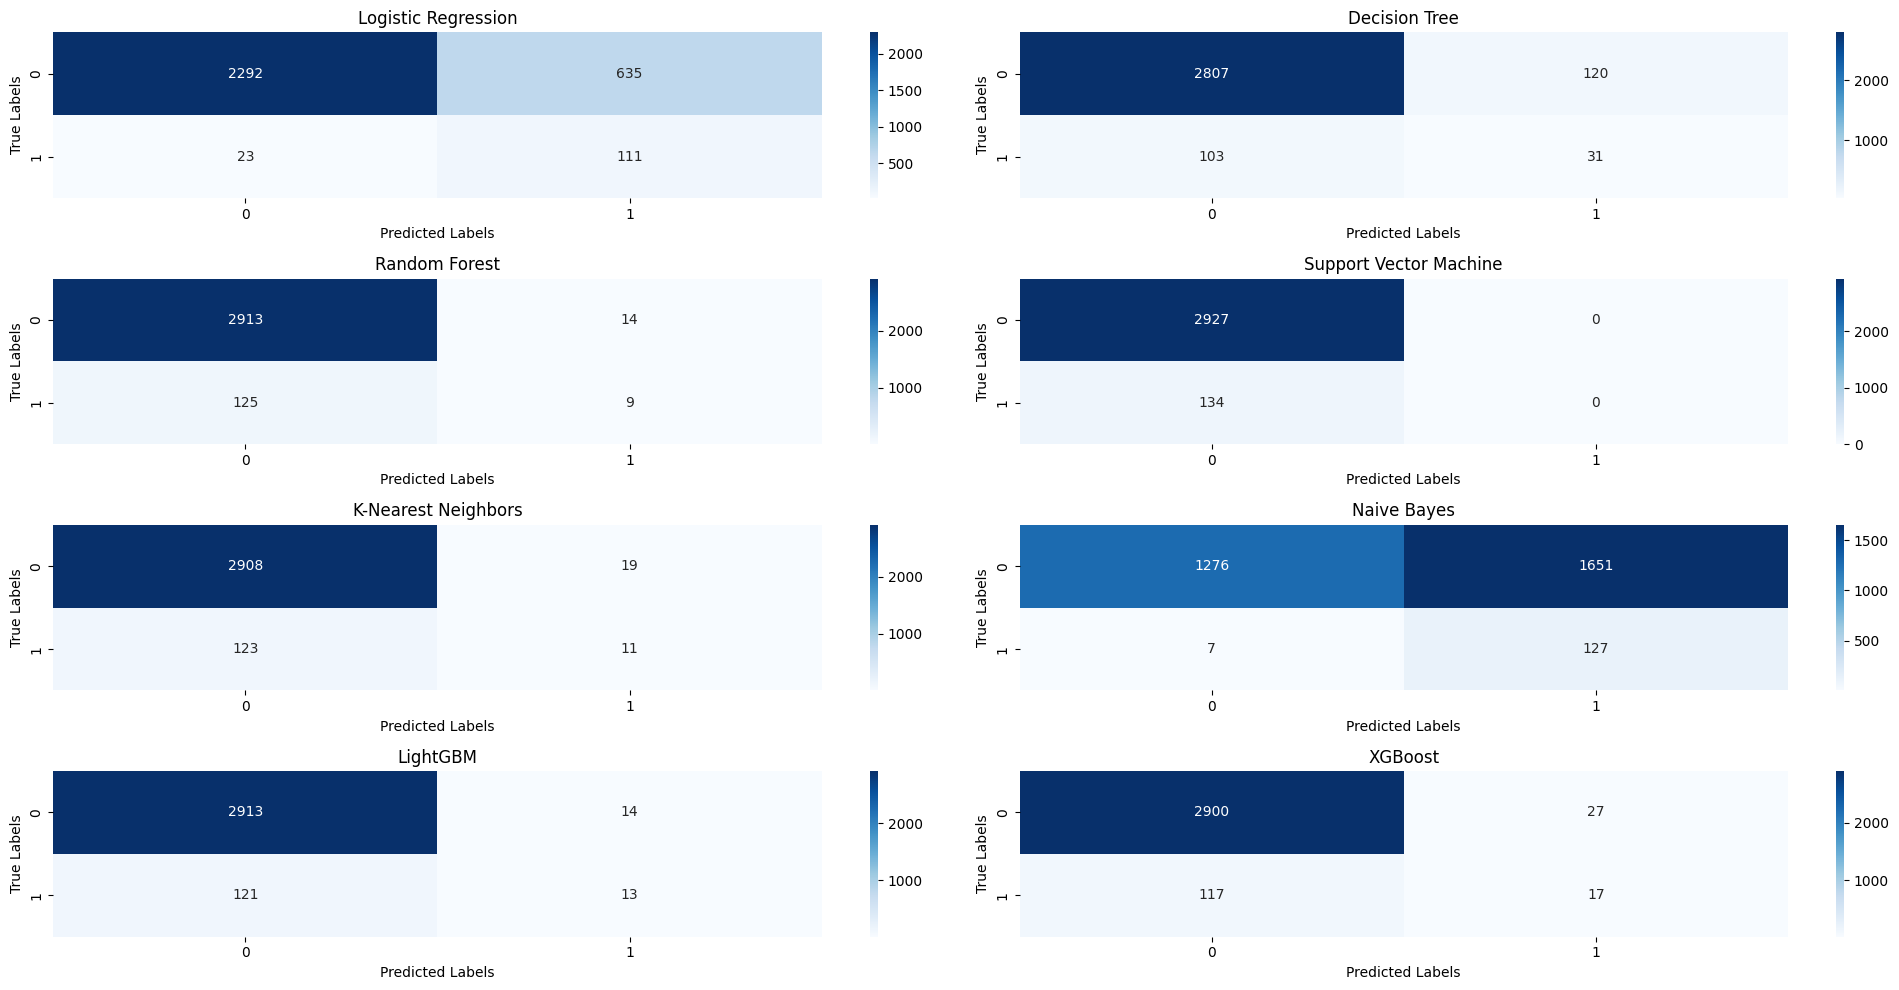

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 10))
for ax, model_name in zip(axes.ravel(), models_to_plot):
  confusion_mat = confusion_mats[model_name]
  sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', ax=ax)
  ax.set_title(model_name)
  ax.set_xlabel('Predicted Labels')
  ax.set_ylabel('True Labels')

plt.tight_layout()
plt.show()

In [ ]:
# Saving the model for deploying
x_train = train_input[numerical_cols + encoded_cols]
y_train = train[target_col]

In [ ]:
preds = lr_with_smote.predict(x_test)

NameError: name 'x_test' is not defined

In [ ]:
preds

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
sub_df = preds

In [ ]:
pd.DataFrame(sub_df).to_csv("submission.csv", index=False)

In [ ]:
sub_df = pd.read_csv("/content/submission.csv")

In [ ]:
# Make predictin for the single input
sub_df["stroke"] = preds

In [ ]:
sub_df

,0,stroke
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
10198,0,0
10199,0,0
10200,0,0
10201,0,0


In [ ]:
train.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
single_input = {
    'gender': 'Male',
    'age': 50,
    'hypertension': 0,
    'heart_disease': 0,
    'ever_married': 'Yes',
    'work_type': 'Private',
    'Residence_type': 'Urban',
    'avg_glucose_level': 100,
    'bmi': 30,
    'smoking_status': 'never smoked'
}

In [ ]:
train.tail(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
15284,15284,Male,53.0,0,0,Yes,Private,Rural,86.96,32.8,Unknown,0
15285,15285,Female,29.0,0,0,No,Private,Rural,88.65,29.3,smokes,0
15286,15286,Female,38.0,0,0,Yes,Govt_job,Rural,90.90,30.3,never smoked,0
15287,15287,Female,5.0,0,0,No,children,Rural,94.33,18.2,Unknown,0
15288,15288,Female,54.0,0,0,Yes,Private,Rural,97.53,28.1,never smoked,0
15289,15289,Male,55.0,0,0,Yes,Govt_job,Urban,55.28,31.5,never smoked,0
15290,15290,Female,56.0,0,0,Yes,Private,Urban,90.40,26.7,smokes,0
15291,15291,Female,32.0,0,0,Yes,Private,Rural,58.46,23.4,never smoked,0
15292,15292,Female,1.0,0,0,No,children,Urban,89.04,17.8,Unknown,0
15293,15293,Female,78.0,0,0,Yes,Private,Rural,130.10,28.7,formerly smoked,0


In [ ]:
input_df = pd.DataFrame([single_input])

In [ ]:
input_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,50,0,0,Yes,Private,Urban,100,30,never smoked


In [ ]:
input_df[encoded_cols] = preprocessor.transform(input_df)

In [ ]:
len(input_df.columns)

22

In [ ]:
X = input_df[numerical_cols + encoded_cols]

In [ ]:
len(X.columns)

17

In [ ]:
lr_with_smote.predict(X)

array([0])

In [ ]:
import joblib

model = {
    'model': lr_with_smote,
    'preprocessor': preprocessor,
    'numerical_cols': numerical_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [ ]:
joblib.dump(model, 'model.joblib')

['model.joblib']